<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Dataframe & Python

Visualizar dados do Titanic

Pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [2]:
import pandas as pd
import numpy as np
import pylab as plt

In [3]:
!ls

sample_data  titanic.csv


In [4]:
titanic_df = pd.read_csv("titanic.csv")

In [ ]:
titanic_df

In [6]:
titanic_df.sample(3).T

,153,143,189
PassengerId,154,144,190
Survived,0,0,0
Pclass,3,3,3
Name,"van Billiard, Mr. Austin Blyler","Burke, Mr. Jeremiah","Turcin, Mr. Stjepan"
Sex,male,male,male
Age,40.5,19.0,36.0
SibSp,0,0,0
Parch,2,0,0
Ticket,A/5. 851,365222,349247
Fare,14.5,6.75,7.8958


In [7]:
plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (10, 10)
bin_size = 10

<pre>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
</pre>

<pre>
SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</pre>

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: title={'center': 'Death and Survival Counts'}, xlabel='Survived'>

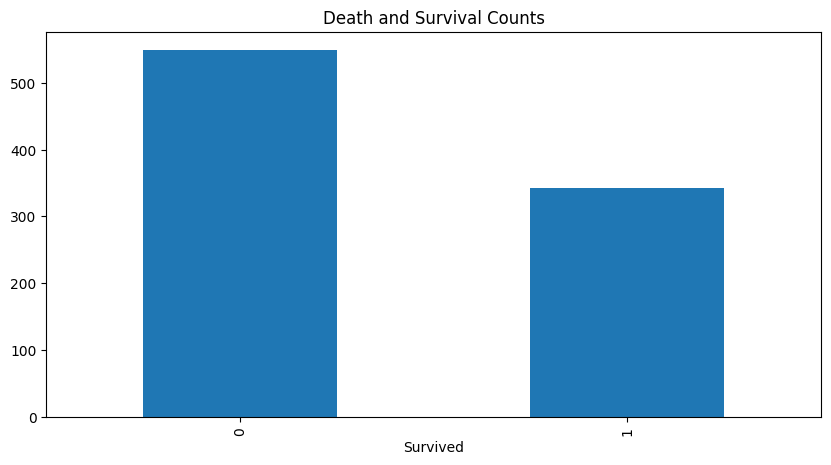

In [10]:
titanic_df['Survived'].value_counts().plot(kind='bar',
                                         title='Death and Survival Counts')

<Axes: title={'center': 'Passenger Class Counts'}, xlabel='Pclass'>

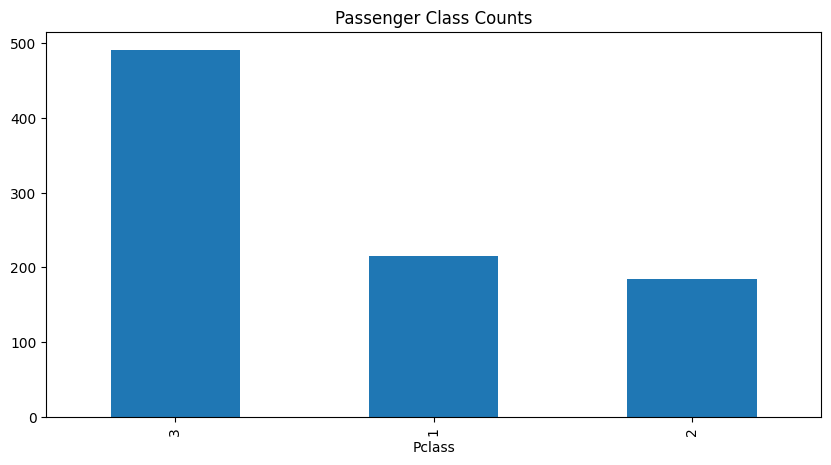

In [11]:
titanic_df['Pclass'].value_counts().plot(kind='bar',
                                       title='Passenger Class Counts')

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

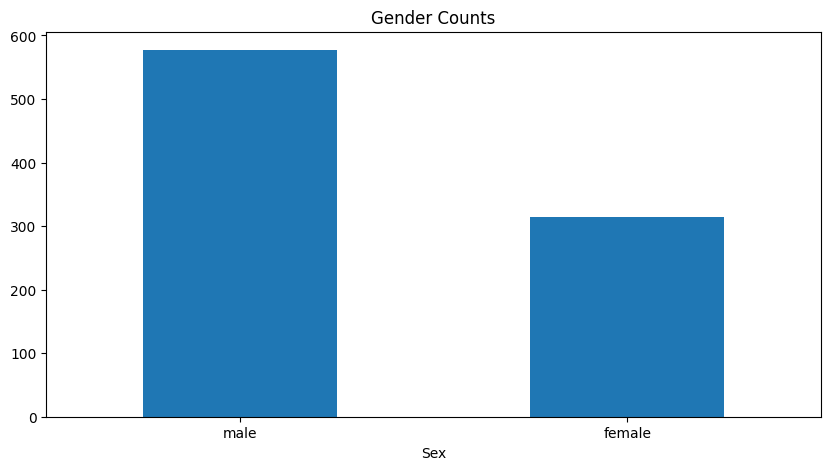

In [12]:
titanic_df['Sex'].value_counts().plot(kind='bar',
                                    title='Gender Counts')
plt.xticks(rotation=0)

<Axes: title={'center': 'Ports of Embarkation Counts'}, xlabel='Embarked'>

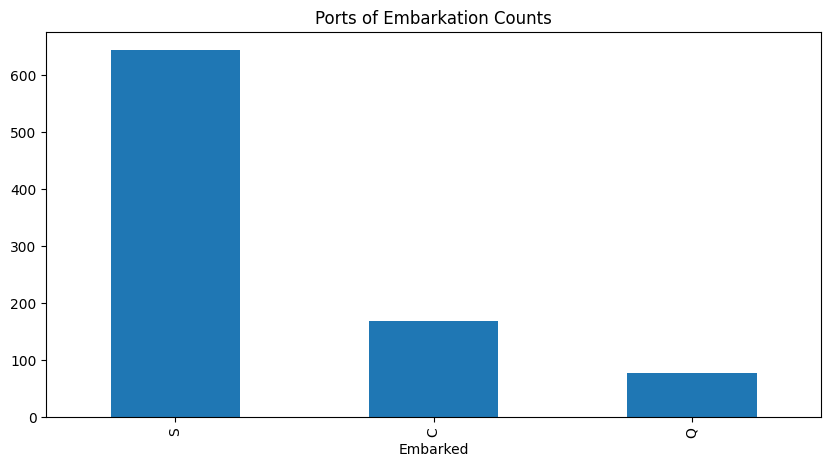

In [13]:
titanic_df['Embarked'].value_counts().plot(kind='bar',
                                         title='Ports of Embarkation Counts')


Text(0.5, 1.0, 'Age Histogram')

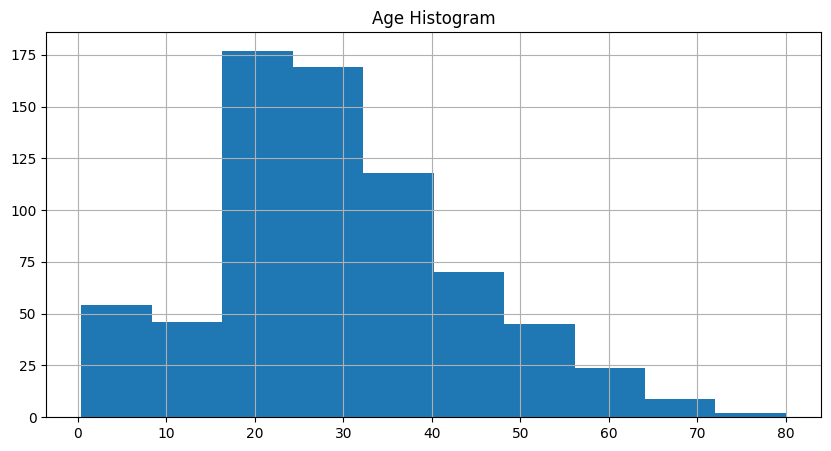

In [14]:
titanic_df['Age'].hist()
plt.title('Age Histogram')

### Passenger Classes

In [15]:
pclass_xt_df = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
pclass_xt_df

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

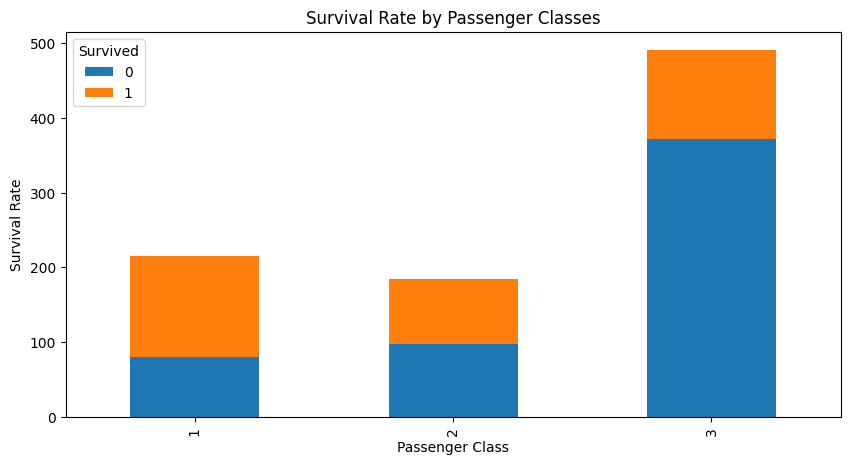

In [16]:
pclass_xt_df.plot(kind='bar',
                   stacked=True,
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

### Sex

In [17]:
sexes_df = sorted(titanic_df['Sex'].unique())
genders_mapping_df = dict(zip(sexes_df, range(0, len(sexes_df) + 1)))
genders_mapping_df

{'female': 0, 'male': 1}

In [18]:

titanic_df['Sex_Val'] = titanic_df['Sex'].map(genders_mapping_df).astype(int)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<Axes: title={'center': 'Survival Rate by Gender'}, xlabel='Sex_Val'>

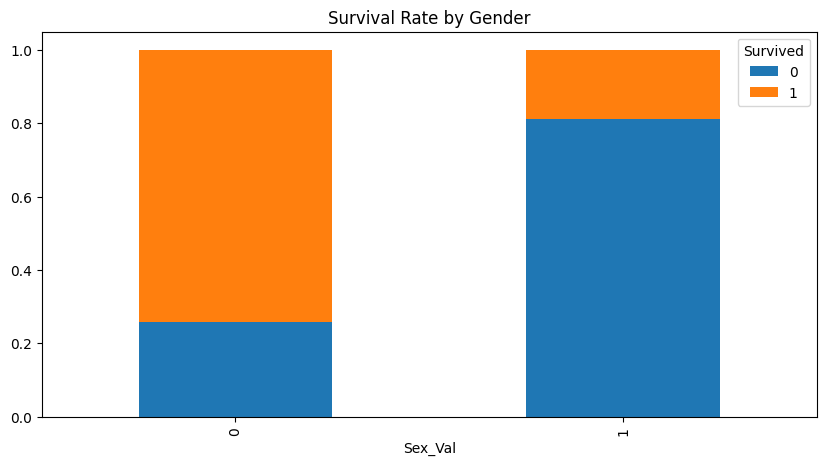

In [19]:
sex_val_xt_df = pd.crosstab(titanic_df['Sex_Val'], titanic_df['Survived'])
sex_val_xt_pct_df = sex_val_xt_df.div(sex_val_xt_df.sum(1).astype(float), axis=0)
sex_val_xt_pct_df.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

In [20]:
passenger_classes_df = sorted(titanic_df['Pclass'].unique())

for p_class in passenger_classes_df:
    print ('M: ', p_class, len(titanic_df[(titanic_df['Sex'] == 'male') &
                             (titanic_df['Pclass'] == p_class)]))
    print( 'F: ', p_class, len(titanic_df[(titanic_df['Sex'] == 'female') &
                             (titanic_df['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Text(0, 0.5, 'Survival Rate')

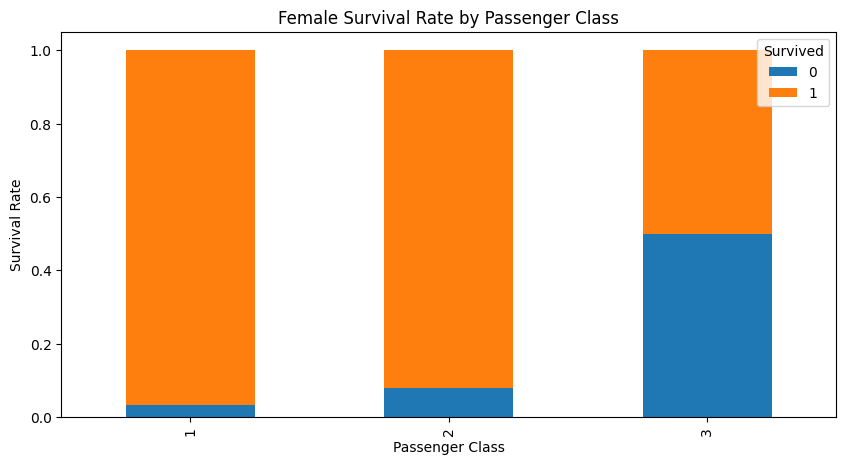

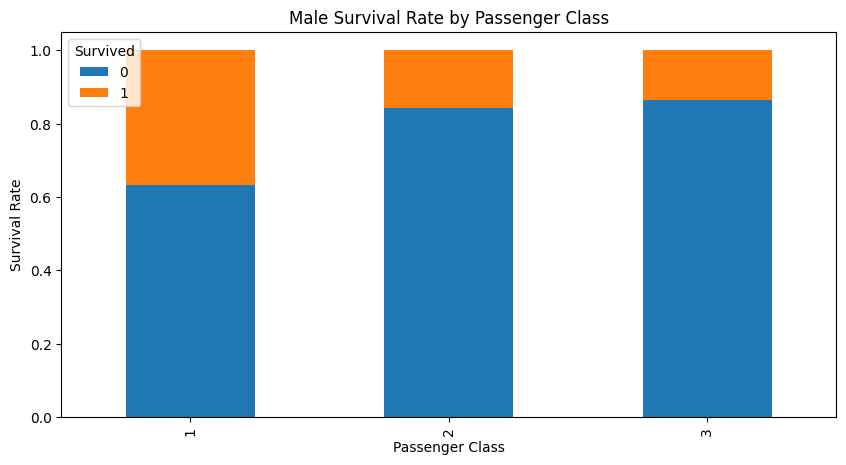

In [24]:
# Plot survival rate by Sex
females_df = titanic_df[titanic_df['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], titanic_df['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar',
                    stacked=True,
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = titanic_df[titanic_df['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], titanic_df['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar',
                  stacked=True,
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

### Embarked

In [28]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0


In [ ]:
embarked_locs = sorted(titanic_df['Embarked'].unique())
embarked_locs_mapping = dict(zip(embarked_locs,
                                 range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

In [ ]:
titanic_df['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [ ]:
titanic_df['Embarked_Val'] = titanic_df['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
titanic_df.head()

### Family Size

In [25]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


Text(0.5, 1.0, 'Family Size Histogram')

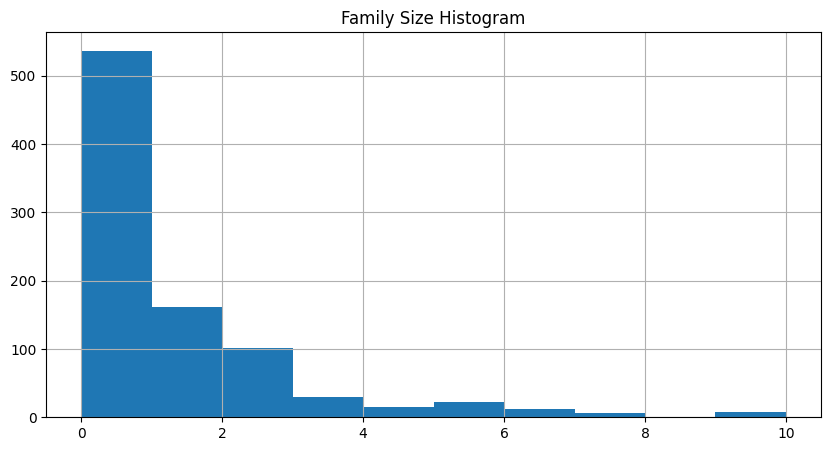

In [26]:
titanic_df['FamilySize'].hist()
plt.title('Family Size Histogram')

Text(0.5, 1.0, 'Survivors by Family Size')

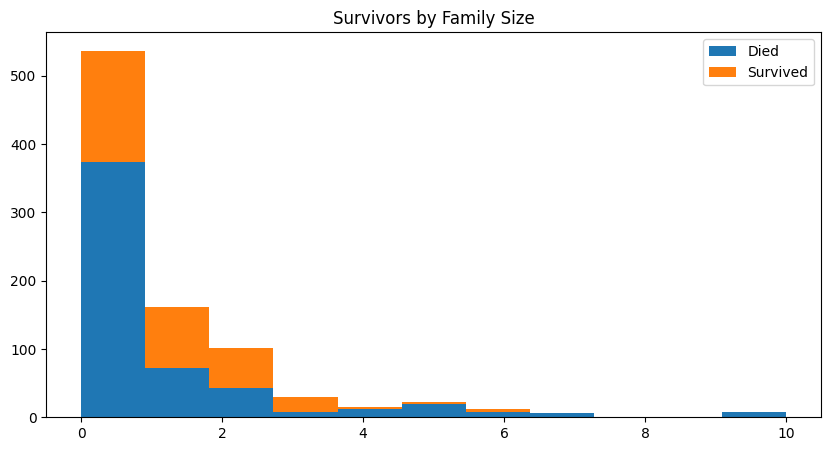

In [27]:
family_sizes_df = sorted(titanic_df['FamilySize'].unique())
family_size_max_df = max(family_sizes_df)

df1 = titanic_df[titanic_df['Survived'] == 0]['FamilySize']
df2 = titanic_df[titanic_df['Survived'] == 1]['FamilySize']

plt.hist([df1, df2],
         bins=family_size_max_df + 1,
         range=(0, family_size_max_df),
         stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

### Age

In [34]:
titanic_df[titanic_df['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [36]:
titanic_df['AgeFill'] = titanic_df['Age']
len(titanic_df[titanic_df['AgeFill'].isnull()])


177

Text(0, 0.5, 'Age')

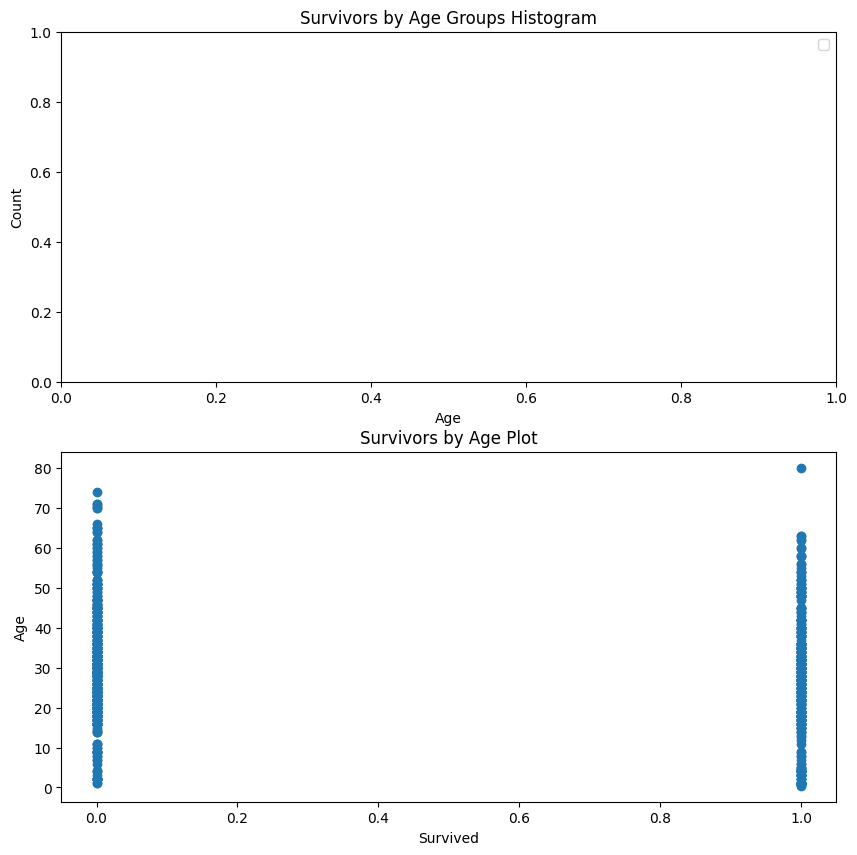

In [39]:
ig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)
df1 = titanic_df[titanic_df['Survived'] == 0]['Age']
df2 = titanic_df[titanic_df['Survived'] == 1]['Age']
max_age = max(titanic_df['AgeFill'])

axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[1].scatter(titanic_df['Survived'], titanic_df['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

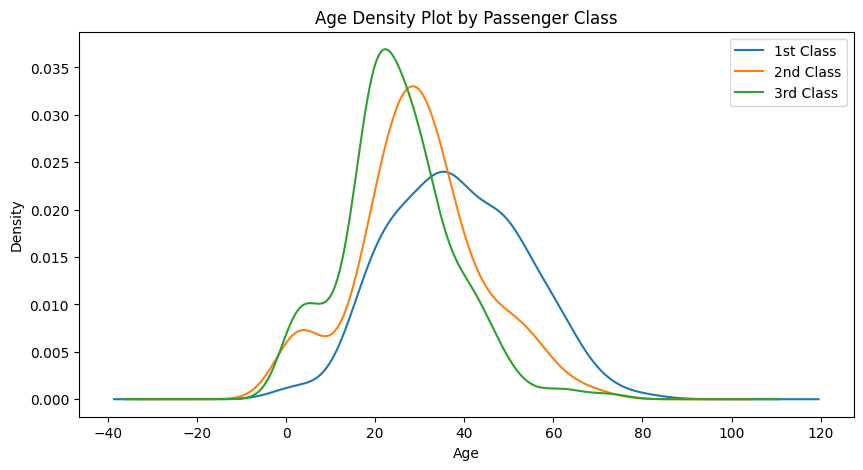

In [41]:
for pclass in passenger_classes_df:
    titanic_df.AgeFill[titanic_df.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')



---



In [43]:
titanic_df.dtypes[titanic_df.dtypes.map(lambda x: x == 'object')]


Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [44]:
titanic_df = titanic_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
                         axis=1)

In [46]:
titanic_df = titanic_df.drop(['Age', 'SibSp', 'Parch', 'PassengerId'], axis=1)
titanic_df.dtypes

Survived        int64
Pclass          int64
Fare          float64
Sex_Val         int64
FamilySize      int64
AgeFill       float64
dtype: object

In [47]:
titanic_data = titanic_df.values
titanic_data

array([[ 0.    ,  3.    ,  7.25  ,  1.    ,  1.    , 22.    ],
       [ 1.    ,  1.    , 71.2833,  0.    ,  1.    , 38.    ],
       [ 1.    ,  3.    ,  7.925 ,  0.    ,  0.    , 26.    ],
       ...,
       [ 0.    ,  3.    , 23.45  ,  0.    ,  3.    ,     nan],
       [ 1.    ,  1.    , 30.    ,  1.    ,  0.    , 26.    ],
       [ 0.    ,  3.    ,  7.75  ,  1.    ,  0.    , 32.    ]])